5. Member 5: Computer Vision Hugging Face Course (Chapters 5-8)
Reproduce the code from Chapters 5-8 of the Computer Vision Hugging Face Course.
Create a detailed video tutorial explaining these chapters.
Cover key concepts and challenges.

UNIT 5

In [ ]:
# Install necessary libraries
!pip install torch torchvision matplotlib

In [ ]:
# Import libraries
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = DataLoader(mnist_data, batch_size=64, shuffle=True)

In [ ]:
# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=256, latent_dim=64):
        super(VAE, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.mu_layer = nn.Linear(hidden_dim, latent_dim)
        self.logvar_layer = nn.Linear(hidden_dim, latent_dim)
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def encode(self, x):
        encoded = self.encoder(x)
        mu = self.mu_layer(encoded)
        logvar = self.logvar_layer(encoded)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
# Loss function
def vae_loss(reconstructed, original, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(reconstructed, original, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
# Initialize model, optimizer, and train
vae = VAE()
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

epochs = 5
vae.train()
for epoch in range(epochs):
    epoch_loss = 0
    for batch, _ in data_loader:
        batch = batch.view(-1, 784)
        optimizer.zero_grad()
        reconstructed, mu, logvar = vae(batch)
        loss = vae_loss(reconstructed, batch, mu, logvar)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss / len(data_loader.dataset)}")

Epoch 1, Loss: 161.947768351237
Epoch 2, Loss: 125.13386153564453
Epoch 3, Loss: 115.9360458577474
Epoch 4, Loss: 112.26203598632813
Epoch 5, Loss: 110.41916883951824


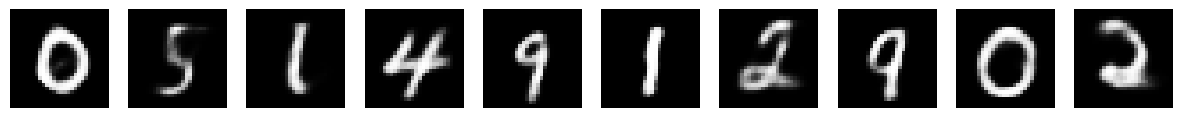

In [ ]:
# Visualize reconstructed images
vae.eval()
with torch.no_grad():
    batch, _ = next(iter(data_loader))
    batch = batch.view(-1, 784)
    reconstructed, _, _ = vae(batch)
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axes[i].imshow(reconstructed[i].view(28, 28).cpu().numpy(), cmap='gray')
        axes[i].axis('off')
    plt.show()

Chapter 6: Basic Computer Vision Tasks

In [ ]:
# Install Hugging Face libraries
!pip install transformers

from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import requests
from PIL import Image
import requests
from io import BytesIO

In [ ]:
# Load a pre-trained model and processor
model_name = "google/vit-base-patch16-224"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
# Ganti dengan URL gambar yang benar
url = "https://datasets-server.huggingface.co/assets/coco/--/coco/train/000000000009.jpg"
response = requests.get(url)

In [ ]:
# Periksa apakah respons berhasil
if response.status_code == 200:
    # Baca gambar dari bytes
    image = Image.open(BytesIO(response.content))
    image.show()  # Menampilkan gambar
else:
    print(f"Failed to fetch image. Status code: {response.status_code}")

Failed to fetch image. Status code: 403


Chapter 7: Video and Video Processing

In [ ]:
import cv2

In [ ]:
# Load video file
video_path = "example.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Gray Frame", gray_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Chapter 8: 3D Vision, Scene Rendering, and Reconstruction

In [ ]:
!pip install torch torchvision
!pip install pytorch3d==0.7.1  # Install PyTorch3D versi 0.7.1


ERROR: Could not find a version that satisfies the requirement pytorch3d==0.7.1 (from versions: none)
ERROR: No matching distribution found for pytorch3d==0.7.1


In [ ]:
import torch
from pytorch3d.io import load_objs_as_meshes_from_path
from pytorch3d.renderer import (
    PerspectiveCameras, RasterizationSettings, MeshRenderer,
    MeshRasterizer, SoftPhongShader, PointLights
)


ModuleNotFoundError: No module named 'pytorch3d'

In [ ]:
# Load 3D mesh
obj_path = "path/to/3d_model.obj"  # Replace with your .obj file
mesh = load_objs_as_meshes([obj_path])


NameError: name 'load_objs_as_meshes' is not defined